In [1]:
# Import the required libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import warnings
from IPython.display import HTML
import seaborn as sns
import scipy.stats as stats
#import plotly.graph_objects as go
#import plotly.express as px

# Set any preferences you want for the notebook
warnings.filterwarnings('ignore')

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
# Set the home directory to the main repository page

os.chdir('..')
os.listdir()

['.DS_Store', 'analysis', 'docs', 'README.md', '.git', 'data']

In [3]:
# Read in the dataset

df = pd.read_csv('data/data.csv')

In [4]:
# Show the first 5 rows

df.head(5)

,Compensation,Log(sales),Stock return,Volatility,Board size,Fraction of female,Fraction of independent,Gender,Age,Tenure,Number of other directorship,Retired
0,597.777996,16.058474,0.503737,2.011101,7,0.285714,0.142857,1,59,3,0,1
1,758.364212,16.058474,0.503737,2.011101,7,0.285714,0.142857,1,58,13,2,1
2,458.106934,16.058474,0.503737,2.011101,7,0.285714,0.142857,0,57,18,3,1
3,327.713700,16.058474,0.503737,2.011101,7,0.285714,0.142857,0,71,12,0,1
4,433.986229,16.058474,0.503737,2.011101,7,0.285714,0.142857,0,63,6,3,1


In [5]:
# Create a column called 'company' which identifies where a company belongs to

df['company'] = 1

company_number = 1
for i in range(1, len(df['company'])):
    if df['Stock return'][i] == df['Stock return'][i-1]:
        df['company'][i] = company_number
    else:
        company_number = company_number + 1
        df['company'][i] = company_number

In [6]:
# Create a raw sales columm by taking the exponent of the Log(sales) column

df['sales'] = np.exp(df['Log(sales)'])

In [7]:
# Check the data types of each of the columns

df.dtypes

Compensation                    float64
Log(sales)                      float64
Stock return                    float64
Volatility                      float64
Board size                        int64
Fraction of female              float64
Fraction of independent         float64
Gender                            int64
Age                               int64
Tenure                            int64
Number of other directorship      int64
Retired                           int64
company                           int64
sales                           float64
dtype: object

In [8]:
# Create the company level features (i.e. drop duplicates)
df_cmp = df[['company', 'Log(sales)', 'Stock return', 'Volatility', 'Board size', 'Fraction of female', 'Fraction of independent', 'sales']].drop_duplicates(ignore_index = True)

## Making a plot of each of the variables so I can see what the data looks like

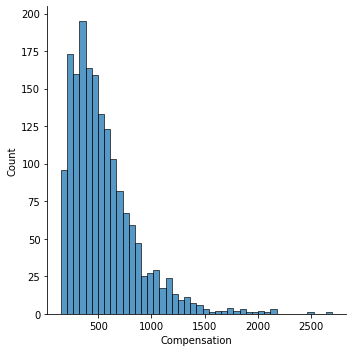

In [9]:
sns.displot(df, x="Compensation")

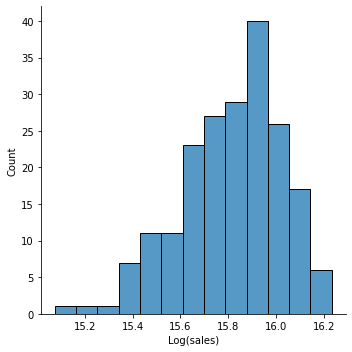

In [10]:
sns.displot(df_cmp, x="Log(sales)")

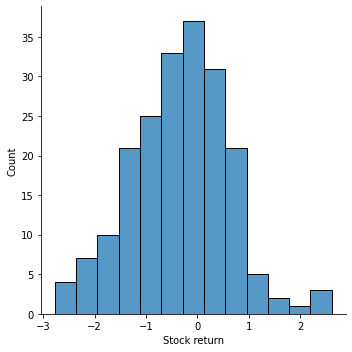

In [11]:
sns.displot(df_cmp, x="Stock return")

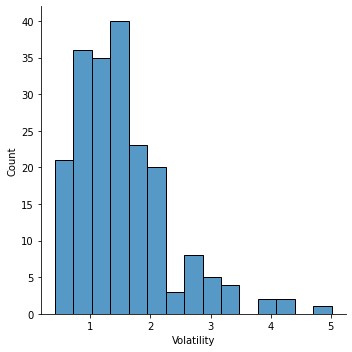

In [12]:
sns.displot(df_cmp, x="Volatility")

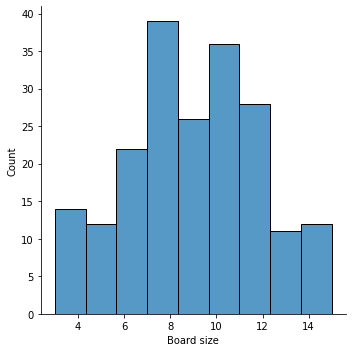

In [13]:
sns.displot(df_cmp, x="Board size")

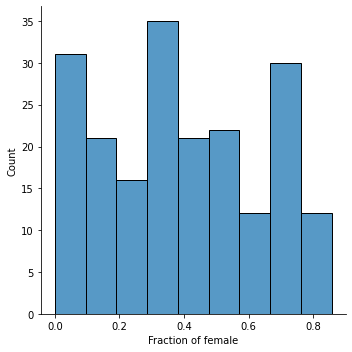

In [14]:
sns.displot(df_cmp, x="Fraction of female")

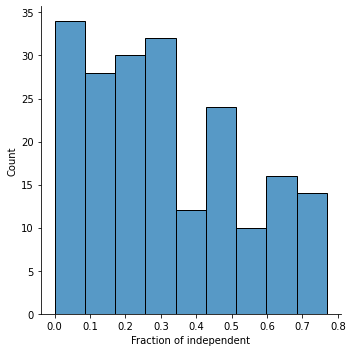

In [15]:
sns.displot(df_cmp, x="Fraction of independent")

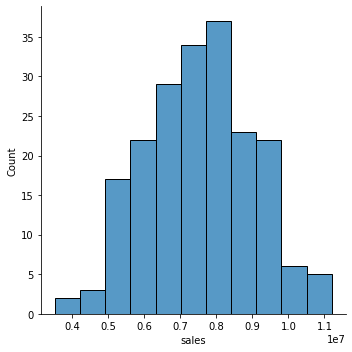

In [16]:
sns.displot(df_cmp, x="sales")

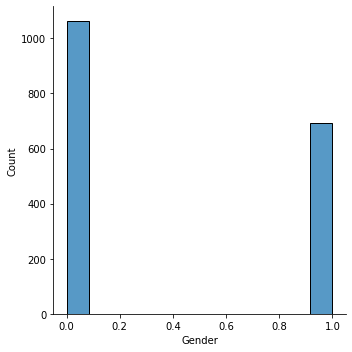

In [17]:
sns.displot(df, x="Gender")

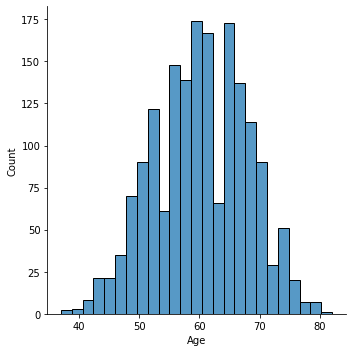

In [18]:
sns.displot(df, x="Age")

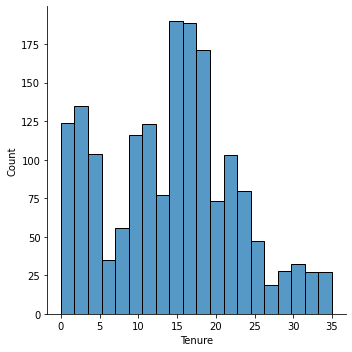

In [19]:
sns.displot(df, x="Tenure")

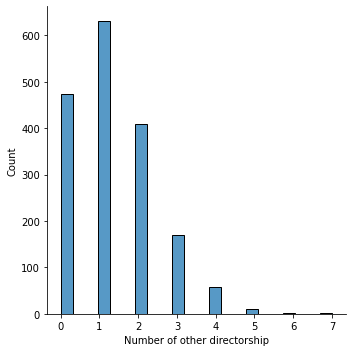

In [20]:
sns.displot(df, x="Number of other directorship")

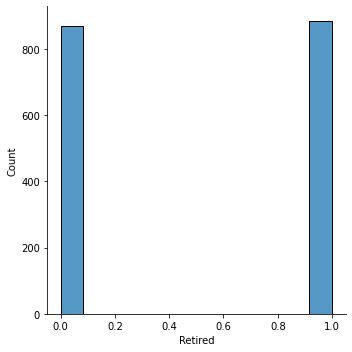

In [21]:
sns.displot(df, x="Retired")

## Lets look specifically at the gender wage gap

<AxesSubplot:xlabel='Gender', ylabel='Compensation'>

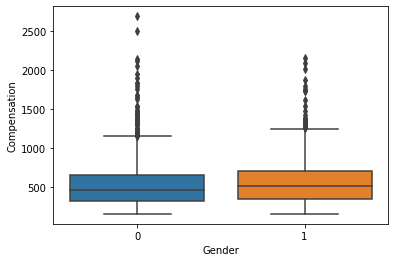

In [22]:
sns.boxplot(data=df, x="Gender", y="Compensation")

In [23]:
# Lets do a t-test
female_comp = np.array(df['Compensation'].loc[df['Gender'] == 1])
male_comp = np.array(df['Compensation'].loc[df['Gender'] == 0])

In [24]:
stats.ttest_ind(a=female_comp, b=male_comp, equal_var=False)

Ttest_indResult(statistic=2.079186770711507, pvalue=0.037767718176004945)

<AxesSubplot:xlabel='Log(sales)', ylabel='Compensation'>

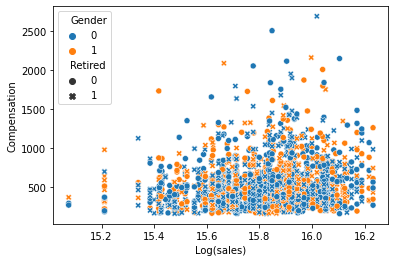

In [25]:
sns.scatterplot(data=df, x="Log(sales)", y="Compensation", hue="Gender", style = "Retired")

<AxesSubplot:xlabel='Log(sales)', ylabel='Compensation'>

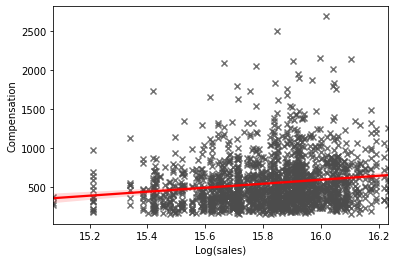

In [26]:
sns.regplot(data=df, x="Log(sales)", y="Compensation", ci=99, marker="x", color=".3", line_kws=dict(color="r"))

In [27]:
dfx = px.data.tips()
# create list of columns to iterate over for buttons
cols = dfx.columns.values.tolist()
# make list of default plotly colors in hex
plotly_colors=[
                '#1f77b4',  # muted blue
                '#ff7f0e',  # safety orange
                '#2ca02c',  # cooked asparagus green
                '#d62728',  # brick red
                '#9467bd',  # muted purple
                '#8c564b',  # chestnut brown
                '#e377c2',  # raspberry yogurt pink
                '#7f7f7f',  # middle gray
                '#bcbd22',  # curry yellow-green
                '#17becf'   # blue-teal
              ]
# create dictionary to associate colors with unique categories
color_dict = dict(zip(dfx['smoker'].unique(),plotly_colors))
# map new column with hex colors to pass to go.Scatter()
dfx['hex']= dfx['smoker'].map(color_dict)
#initialize scatter plot
fig = go.Figure(
    go.Scatter(
        x=dfx['total_bill'],
        y=dfx['tip'],
        text=dfx['smoker'],
        marker=dict(color=dfx['hex']),
        mode="markers"
    )
) 
# initialize dropdown menus
fig.update_layout(
    updatemenus=[
        {
            "buttons": [
                {
                    "label": f"x - {x}",
                    "method": "update",
                    "args": [
                        {"x": [dfx[x]]},
                        {"xaxis": {"title": x}},
                    ],
                }
                for x in cols
            ]
        },
        {
            "buttons": [
                {
                    "label": f"y - {x}",
                    "method": "update",
                    "args": [
                        {"y": [dfx[x]]},
                        {"yaxis": {"title": x}}
                    ],
                }
                for x in cols
            ],
            "y": 0.9,
        },
    ],
    margin={"l": 0, "r": 0, "t": 25, "b": 0},
    height=700
)
fig.show()

NameError: name 'px' is not defined